In [ ]:
from google.colab import files, drive
import numpy as np
import glob
from skimage.io import imread
from matplotlib.image import imread
from skimage.transform import resize
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow import keras
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import accuracy_score

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! rm -r dataset

rm: cannot remove 'dataset': No such file or directory


In [ ]:
# Copy dataset from drive USARE QUESTO PER SVM

!cp -r '/content/drive/My Drive/ML_dataset_prova.zip' dataset.zip
!unzip dataset.zip -d content
! mv content/ML_dataset dataset

! rm dataset.zip
! rm -r content

Archive:  dataset.zip
   creating: content/ML_dataset/
  inflating: content/ML_dataset/cloudy_0.jpg  
  inflating: content/ML_dataset/cloudy_1.jpg  
  inflating: content/ML_dataset/cloudy_10.jpg  
  inflating: content/ML_dataset/cloudy_11.jpg  
  inflating: content/ML_dataset/cloudy_12.jpg  
  inflating: content/ML_dataset/cloudy_13.jpg  
  inflating: content/ML_dataset/cloudy_14.jpg  
  inflating: content/ML_dataset/cloudy_15.jpg  
  inflating: content/ML_dataset/cloudy_16.jpg  
  inflating: content/ML_dataset/cloudy_17.jpg  
  inflating: content/ML_dataset/cloudy_18.jpg  
  inflating: content/ML_dataset/cloudy_19.jpg  
  inflating: content/ML_dataset/cloudy_2.jpg  
  inflating: content/ML_dataset/cloudy_20.jpg  
  inflating: content/ML_dataset/cloudy_21.jpg  
  inflating: content/ML_dataset/cloudy_22.jpg  
  inflating: content/ML_dataset/cloudy_23.jpg  
  inflating: content/ML_dataset/cloudy_24.jpg  
  inflating: content/ML_dataset/cloudy_25.jpg  
  inflating: content/ML_dataset/clou

In [ ]:
#USARE QUESTO PER RETE NEURALE
#!cp -r '/content/drive/My Drive/ML_dataset_1.5K.zip' dataset.zip
#!unzip dataset.zip -d content
#! mv content/ML_dataset dataset

#! rm dataset.zip
#! rm -r content

In [ ]:
# Creation of the random sorted image list

img_list = sorted(glob.glob("./dataset/*.jpg"))

random.shuffle(img_list)

img_list_clean = []

for item in img_list:
  img_list_clean.append(item.replace("./dataset/","").replace(".jpg",""))



In [ ]:
# Transform images into empty numpy arrays
dataset = np.empty((len(img_list), 200,300, 3), dtype=np.float64)

# Populate dataset
for i, img_path in enumerate(img_list):
    # read image
    img = imread(img_path)
    # resize image (1 channel used for example; 1 for gray-scale, 3 for RGB-scale)
    img = resize(img, output_shape=(200, 300, 3), preserve_range=True)
    # save to numpy array
    dataset[i] = img


In [ ]:
label_list = []

for item in img_list_clean:
  if 'cloudy' in item:
    label_list.append(0)
  elif 'foggy' in item:
    label_list.append(1)
  elif 'rainy' in item:
    label_list.append(2)
  elif 'sunny' in item:
    label_list.append(3)
  elif 'sunrise' in item:
    label_list.append(4)

label_array= np.array(label_list) # 0: CLOUDY, 1: FOGGY, 2: RAINY, 3: SUNNY, 4: SUNRISE



In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(200, 
                                                              300,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
image_train, image_test, label_train, label_test = train_test_split(dataset, label_array, random_state=0)

#image_train, image_test = image_train / 255.0, image_test /255.0

print("Image_train shape:", image_train.shape)
print("Label_train shape:", label_train.shape)
print("Image_test shape:", image_test.shape)
print("Label_test shape:", label_test.shape)

Image_train shape: (1077, 200, 300, 3)
Label_train shape: (1077,)
Image_test shape: (359, 200, 300, 3)
Label_test shape: (359,)


In [ ]:
image_train= np.around(image_train,2)
image_test = np.around(image_test,2)


In [ ]:
class_name = ['Cloudy', 'Foggy', 'Rainy', 'Sunny', 'Sunrise']

In [ ]:
image_plot_train = image_train / 255

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_plot_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[label_train[i]])
plt.show()


NameError: ignored

In [ ]:
# Creazione della base convoluzionale

num_classes = 5

model = Sequential([
                     data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(200, 300, 3)),
  
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.8),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
# Compilazione del modello

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 200, 300, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 200, 300, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 200, 300, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 150, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 75, 64)       

In [ ]:
history = model.fit(image_train, label_train, epochs=50, 
                    validation_data=(image_test, label_test))

Epoch 1/50
34/34 [==============================] - 34s 100ms/step - loss: 1.1604 - accuracy: 0.5097 - val_loss: 0.9212 - val_accuracy: 0.6797
Epoch 2/50
34/34 [==============================] - 2s 73ms/step - loss: 0.7959 - accuracy: 0.6955 - val_loss: 0.8380 - val_accuracy: 0.7382
Epoch 3/50
34/34 [==============================] - 2s 72ms/step - loss: 0.7052 - accuracy: 0.7298 - val_loss: 0.6475 - val_accuracy: 0.7632
Epoch 4/50
34/34 [==============================] - 2s 72ms/step - loss: 0.5980 - accuracy: 0.7772 - val_loss: 0.7256 - val_accuracy: 0.7409
Epoch 5/50
34/34 [==============================] - 2s 71ms/step - loss: 0.5559 - accuracy: 0.7799 - val_loss: 0.5683 - val_accuracy: 0.7883
Epoch 6/50
34/34 [==============================] - 2s 72ms/step - loss: 0.4990 - accuracy: 0.8115 - val_loss: 0.5204 - val_accuracy: 0.8134
Epoch 7/50
34/34 [==============================] - 2s 71ms/step - loss: 0.5688 - accuracy: 0.7790 - val_loss: 0.5114 - val_accuracy: 0.8301
Epoch 8/50


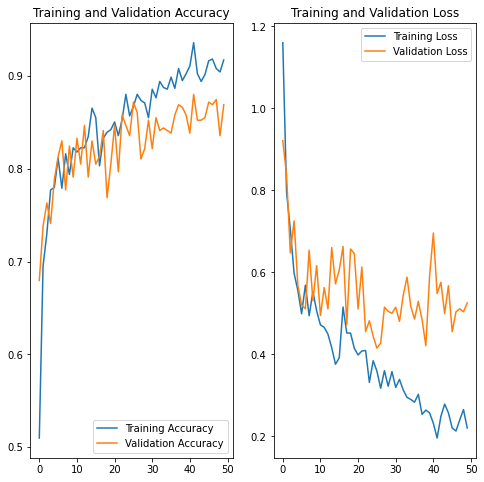

In [ ]:
# Valutazione del modello

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

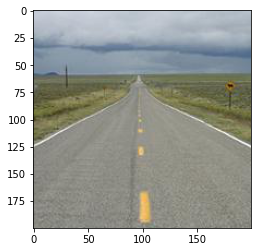

In [ ]:
img_test_cloudy = imread("/content/drive/MyDrive/cloudy_226.jpg")
plt.imshow(img_test_cloudy, cmap=plt.cm.binary)
plt.show()

In [ ]:
img_test_cloudy = img_test_cloudy[0:200, 0:300]
img_test_cloudy = resize(img_test_cloudy, output_shape=(200, 300, 3), preserve_range=True)
img_array = np.empty((1, 200,300, 3), dtype=np.float64)
img_array[0] = img_test_cloudy


In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Cloudy with a 93.71 percent confidence.


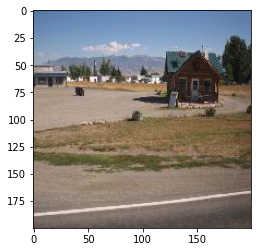

In [ ]:
img_test_sunny = imread("/content/drive/MyDrive/sunny_454.jpg")
plt.imshow(img_test_sunny, cmap=plt.cm.binary)
plt.show()

In [ ]:
img_test_sunny = img_test_sunny[0:200, 0:300]
img_test_sunny = resize(img_test_sunny, output_shape=(200, 300, 3), preserve_range=True)
img_array = np.empty((1, 200,300, 3), dtype=np.float64)
img_array[0] = img_test_sunny


In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Sunny with a 96.17 percent confidence.


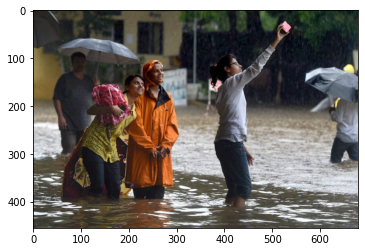

In [ ]:
img_test_rainy = imread("/content/drive/MyDrive/rainy_27.jpg")
plt.imshow(img_test_rainy, cmap=plt.cm.binary)
plt.show()

In [ ]:
img_test_rainy = img_test_rainy[0:200, 0:300]
img_test_rainy = resize(img_test_rainy, output_shape=(200, 300, 3), preserve_range=True)
img_array = np.empty((1, 200,300, 3), dtype=np.float64)
img_array[0] = img_test_rainy

In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Sunny with a 96.39 percent confidence.


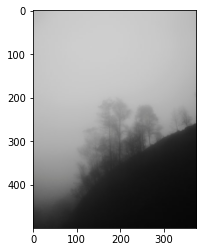

In [ ]:
img_test_foggy = imread("/content/drive/MyDrive/foggy_38.jpg")
plt.imshow(img_test_foggy, cmap=plt.cm.binary)
plt.show()

In [ ]:
img_test_foggy = img_test_foggy[0:200, 0:300]
img_test_foggy= resize(img_test_foggy, output_shape=(200, 300, 3), preserve_range=True)
img_array = np.empty((1, 200,300, 3), dtype=np.float64)
img_array[0] = img_test_foggy

In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Foggy with a 87.73 percent confidence.


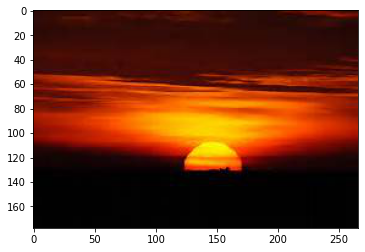

In [ ]:
img_test_sunrise = imread("/content/drive/MyDrive/sunrise_229.jpg")
plt.imshow(img_test_sunrise, cmap=plt.cm.binary)
plt.show()

In [ ]:
img_test_sunrise = img_test_sunrise[0:200, 0:300]
img_test_sunrise= resize(img_test_sunrise, output_shape=(200, 300, 3), preserve_range=True)
img_array = np.empty((1, 200,300, 3), dtype=np.float64)
img_array[0] = img_test_sunrise

In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Sunrise with a 100.00 percent confidence.


In [ ]:
predictions_final = model.predict(image_test)

NameError: ignored

In [ ]:
score = tf.nn.softmax(predictions_final)
score.shape[1]

In [ ]:
score = tf.nn.softmax(predictions_final)
score_finale = list()
for x in range(score.shape[0]):
   score_finale.append( np.argmax(score[x]))
score_finale

In [ ]:
tf.math.confusion_matrix(
    label_test, score_finale, num_classes=None, weights=None, dtype=tf.dtypes.int32,
    name=None
)    # 0: CLOUDY, 1: FOGGY, 2: RAINY, 3: SUNNY, 4: SUNRISE

In [ ]:
flat_data_arr=[] #input array

for i in range(dataset.shape[0]):
  flat_data_arr.append(dataset[i].flatten())

flat_data=np.array(flat_data_arr)
target = np.array(label_array)
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.20,random_state=77,stratify=target)
flat_data


#df=pd.DataFrame(flat_data_arr) #dataframe #PROBLEMA
#df['Target']=target

array([[174.14333333, 166.215     , 176.215     , ...,  90.        ,
         95.        , 114.        ],
       [193.        , 213.        , 220.        , ...,  48.        ,
         34.        ,  47.        ],
       [ 65.        ,  43.        ,  66.        , ...,  84.06229167,
         61.49166667,  47.229375  ],
       ...,
       [134.        , 189.        , 253.        , ..., 129.        ,
        190.        , 253.        ],
       [ 10.        ,  11.        ,   8.        , ...,  21.193125  ,
         15.505     ,  24.505     ],
       [ 77.34      ,  20.11      ,  17.8       , ...,  24.81      ,
          1.99      ,   0.27      ]])

In [ ]:
 
 lin_clf = svm.LinearSVC(C = 0.001, max_iter= 100000)
 lin_clf.fit(x_train, y_train)

LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=100000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
print(y_test)
print(lin_clf.predict(x_test))
lin_clf.score(x_test,y_test)

[0 3 0 0 2 1 1 0 2 3 4 3 2 2 3 2 3 1 1 2 2 2 0 2 1 4 3 2 1 4 4 4 0 3 1 1 4
 4 3 0 0 2 2 3 0 3 2 0 3 0 0 3 0 2 0 3 4 1 3 4 2 3 0 4 4 2 3 0 3 1 3 1 1 2
 1 0 1 2 0]
[1 1 0 0 2 1 1 0 0 1 4 1 2 2 3 0 1 0 1 2 0 1 0 2 4 4 1 2 1 4 1 1 2 3 1 0 4
 4 3 0 0 1 2 0 1 3 0 1 0 0 0 3 0 2 0 3 4 1 3 4 1 4 1 4 4 1 3 0 3 1 0 0 1 2
 1 2 1 2 0]


0.6329113924050633

Confusion matrix, without normalization
[[12  4  2  0  0]
 [ 3 10  0  0  1]
 [ 4  4 10  0  0]
 [ 3  5  0  9  1]
 [ 0  2  0  0  9]]
Normalized confusion matrix
[[0.66666667 0.22222222 0.11111111 0.         0.        ]
 [0.21428571 0.71428571 0.         0.         0.07142857]
 [0.22222222 0.22222222 0.55555556 0.         0.        ]
 [0.16666667 0.27777778 0.         0.5        0.05555556]
 [0.         0.18181818 0.         0.         0.81818182]]


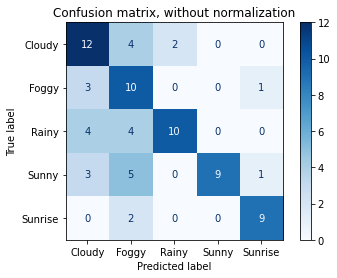

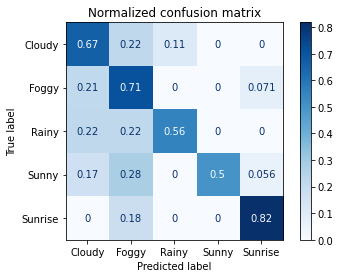

In [ ]:
#CONFUSION MATRIX
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lin_clf, x_test, y_test,
                                 display_labels=class_name,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()